# Data Analysis on List of Billionaires published by Forbes in 2022

In [1]:
#importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

In [2]:
data = pd.read_csv("F:\\Excel files\\forbes_2022_billionaires.csv")


In [3]:
data.head(2)

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,6/28/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1/12/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."


In [4]:
data.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [5]:
# Removing Unnecessary Columns

In [6]:
data.drop(['residenceMsa', 'numberOfSiblings', 'bio','about'], axis = 1, inplace = True)

In [7]:
data.drop(['philanthropyScore','title','organization'], axis = 1, inplace = True)

In [8]:
data.drop(['year','month'], axis = 1, inplace = True)

In [9]:
data.drop(['state'], axis = 1, inplace = True)

In [10]:
data.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'category', 'source',
       'country', 'city', 'countryOfCitizenship', 'selfMade', 'gender',
       'birthDate'],
      dtype='object')

In [11]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [12]:
data.isnull().sum()

rank                     0
personName               0
age                      0
finalWorth               0
category                 0
source                   0
country                 13
city                    44
countryOfCitizenship     0
selfMade                 0
gender                  16
birthDate               99
dtype: int64

In [13]:
data[(data['city'].isnull())&data['country'].isnull()]

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
65,66,Guillaume Pousaz,40.000000,23000,Finance & Investments,fintech,NaN,NaN,Switzerland,True,M,8/15/1981
164,163,Zhang Congyuan,74.000000,11700,Fashion & Retail,shoes,NaN,NaN,Taiwan,True,M,1/1/1948
1102,1096,Karen Virginia Beckmann Legoretta,52.000000,2800,Food & Beverage,tequila,NaN,NaN,Mexico,False,F,NaN
1282,1238,Christiane Schoeller,64.210689,2500,Media & Entertainment,publishing,NaN,NaN,Germany,False,F,NaN
1311,1292,Kevin David Lehmann,19.000000,2400,Fashion & Retail,drugstores,NaN,NaN,Germany,False,M,9/1/2002
1661,1645,Philip Fayer,64.210689,1800,Finance & Investments,online payments,NaN,NaN,Canada,True,M,NaN
1733,1729,Alex Birkenstock,53.000000,1700,Fashion & Retail,shoes,NaN,NaN,Germany,False,M,11/18/1968
1787,1729,Renate Sick-Glaser,64.210689,1700,Technology,sensor technology,NaN,NaN,Germany,False,F,NaN
2090,2076,Cho Jyh-jer,64.210689,1400,Technology,semiconductors,NaN,NaN,Taiwan,True,M,NaN
2394,2324,Ulrich Mommert & family,81.000000,1200,Automotive,lighting,NaN,NaN,Austria,True,M,1/11/1941


In [14]:
data['city'].fillna(data['countryOfCitizenship'],inplace=True)
data['country'].fillna(data['countryOfCitizenship'],inplace=True)
data['gender'].fillna(data['gender'].mode(), inplace=True)

In [15]:
data['selfMade'] = data['selfMade'].astype(str)

In [16]:
data['birthDate'] = pd.to_datetime(data['birthDate'])

In [17]:
data['birthDate'].fillna(data['birthDate'].mean(), inplace=True)

In [18]:
data.isnull().sum()

rank                     0
personName               0
age                      0
finalWorth               0
category                 0
source                   0
country                  0
city                     0
countryOfCitizenship     0
selfMade                 0
gender                  16
birthDate                0
dtype: int64

In [19]:
data.shape

(2668, 12)

# EDA

In [20]:
data.head(2)

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12


## Count of Billionaires who are Self Made 

In [21]:
data.groupby('selfMade').selfMade.count()

selfMade
False     777
True     1891
Name: selfMade, dtype: int64

F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selfMade', ylabel='count'>

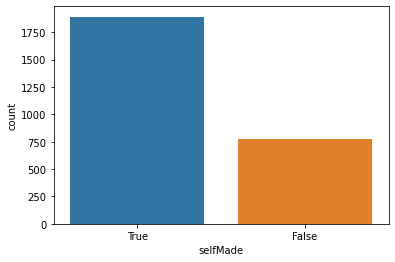

In [23]:
sns.countplot(data['selfMade'])

## Count of Billionaires by their Gender 

In [24]:
data.groupby('gender').gender.count()

gender
F     311
M    2341
Name: gender, dtype: int64

F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

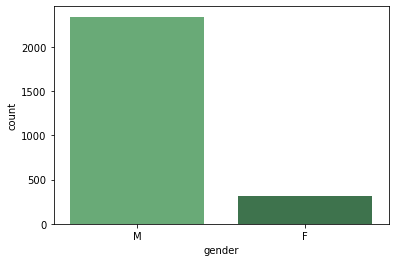

In [25]:
sns.countplot(data['gender'],palette = "Greens_d")

## Top 10 Countries with Most Billionaires

In [26]:
country = list(data['country'].value_counts().keys()[0:10])
country

['United States',
 'China',
 'India',
 'Germany',
 'United Kingdom',
 'Switzerland',
 'Hong Kong',
 'Russia',
 'Brazil',
 'Italy']

In [27]:
No_of_Bill = list(data['country'].value_counts()[0:10])
No_of_Bill

[748, 571, 159, 118, 85, 74, 68, 65, 54, 49]

F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


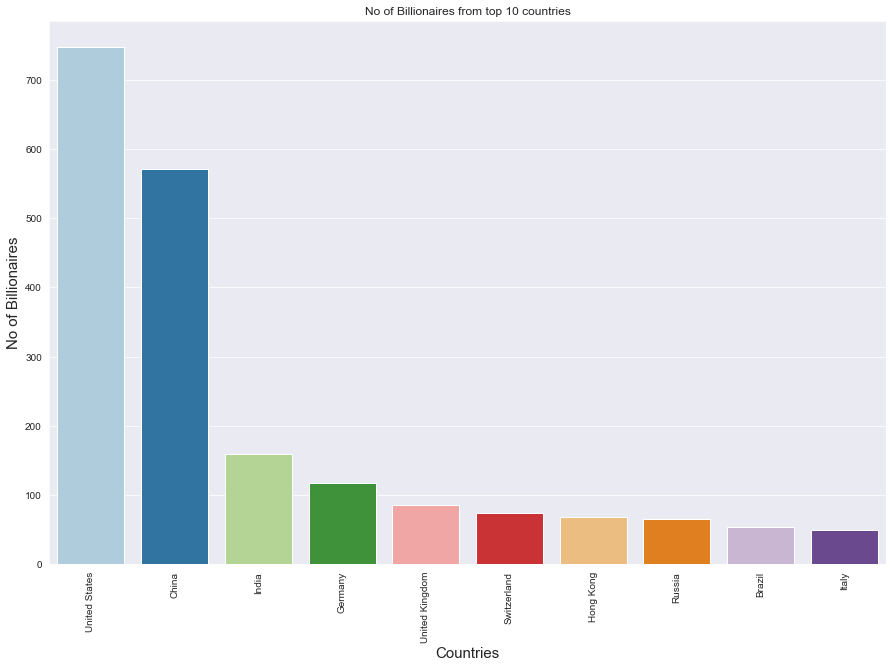

In [28]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")

sns.barplot(country,No_of_Bill,palette="Paired")
plt.ylabel("No of Billionaires" , fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.title("No of Billionaires from top 10 countries")
plt.xticks(rotation=90)
plt.show()

Most of the billionaires according to forbes in 2022 are from US

In [ ]:
#average_finalworth = data.groupby(['country'], as_index=False)
#avg_finalworth_agg = average_finalworth['finalWorth'].agg(np.mean)
#avg_finalworth_agg = avg_finalworth_agg.sort_values(['country'],ascending=False)
#avg_finalworth_agg.head(10)

## Average Final Worth According to Gender 

In [42]:
avg_finalworth_g = data.groupby(['gender'], as_index=False)
avg_finalworth_agg = avg_finalworth_g['finalWorth'].agg(np.mean)
avg_finalworth_agg

,gender,finalWorth
0,F,4647.266881
1,M,4759.696711


<AxesSubplot:xlabel='gender', ylabel='finalWorth'>

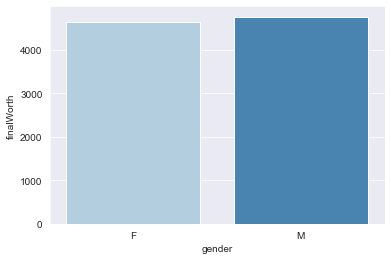

In [47]:
sns.barplot(x='gender',y='finalWorth' , data=avg_finalworth_agg , palette='Blues')

Average Final Worth of Men is bit higher in comparison to Women

## Distribution plot of age of Billionaires

<Figure size 1800x1080 with 0 Axes>

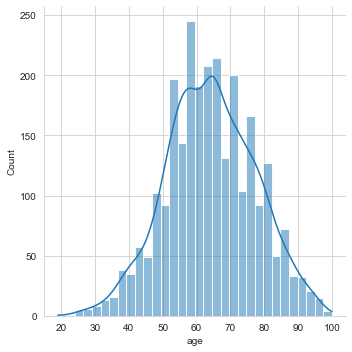

In [53]:
plt.figure(figsize=(25,15))
sns.set_style("whitegrid")
sns.displot(data['age'], kde=True)
plt.show()

Most of the Billionaires belongs to 50-70 years of age group

## Billionaires Count as per Category 

In [54]:
data.head(2)

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12


In [56]:
data['category'].value_counts()

Finance & Investments         392
Technology                    343
Manufacturing                 337
Fashion & Retail              250
Healthcare                    217
Food & Beverage               203
Real Estate                   193
Diversified                   180
Media & Entertainment          99
Energy                         95
Automotive                     70
Metals & Mining                68
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      35
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64

F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


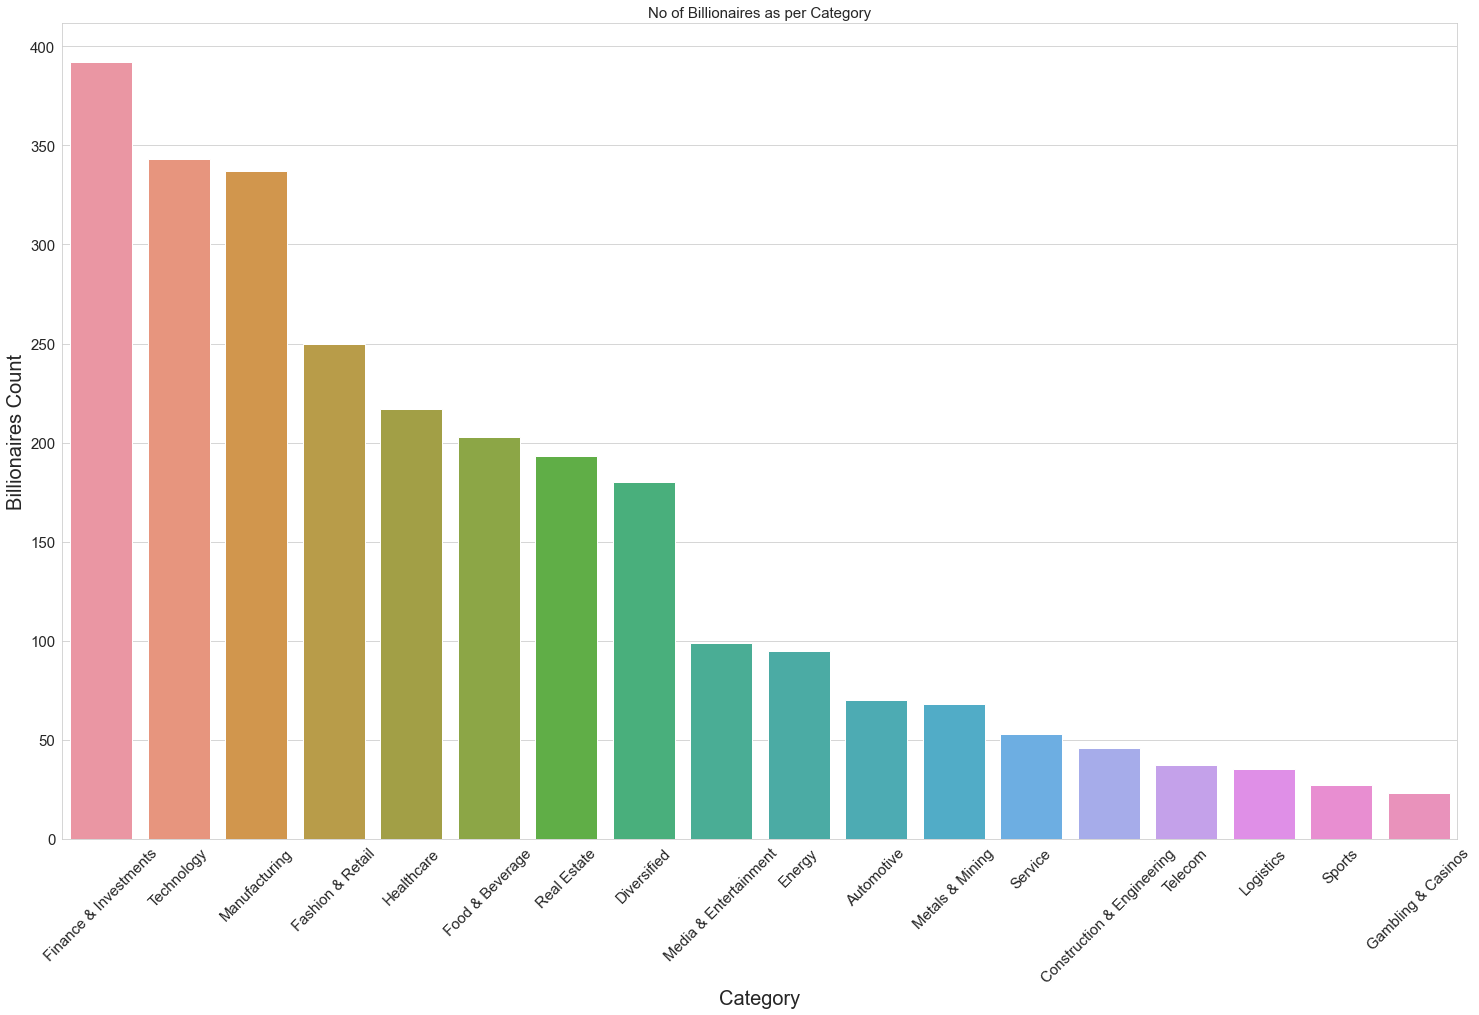

In [64]:
plt.figure(figsize=(25,15))
sns.set_style("whitegrid")
sns.countplot(data['category'],order = data['category'].value_counts().index)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Billionaires Count",fontsize=20)
plt.title("No of Billionaires as per Category",fontsize=15)
plt.show()

Most of the Billionaires belongs to "Finance and Investment" category while "Gambling and Casinos" are the least 

## Billionaires per Age Group

In [66]:
data.head(3)

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,Paris,France,False,M,1949-03-05


In [67]:
data['group'] = pd.cut(data['age'], bins = [18, 30, 50, 100], include_lowest = True, labels = ['18-30', '30-50', '50+'])
data['group']

0       30-50
1         50+
2         50+
3         50+
4         50+
        ...  
2663      50+
2664      50+
2665      50+
2666    30-50
2667      50+
Name: group, Length: 2668, dtype: category
Categories (3, object): ['18-30' < '30-50' < '50+']

In [70]:
data['group'].value_counts()

50+      2299
30-50     354
18-30      15
Name: group, dtype: int64

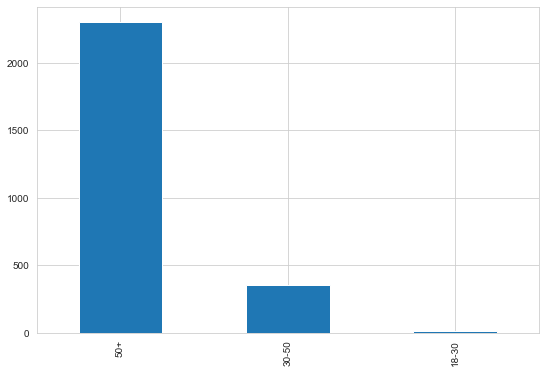

In [71]:
data['group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.show()


More than 2000 Billionaires are of 50 or more than 50 years old

## Top 10 Billionaires from US and their Final Worth and Source

In [72]:
data.head(2)

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,group
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28,30-50
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12,50+


In [84]:
df_cn = data[(data['country'] == 'United States')][0:10]
df_cn

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,group
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28,30-50
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12,50+
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Medina,United States,True,M,1955-10-28,50+
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M,1930-08-30,50+
5,6,Larry Page,49.0,111000,Technology,Google,United States,Palo Alto,United States,True,M,1973-03-26,30-50
6,7,Sergey Brin,48.0,107000,Technology,Google,United States,Los Altos,United States,True,M,1973-08-21,30-50
7,8,Larry Ellison,77.0,106000,Technology,software,United States,Lanai,United States,True,M,1944-08-17,50+
8,9,Steve Ballmer,66.0,91400,Technology,Microsoft,United States,Hunts Point,United States,True,M,1956-03-24,50+
11,12,Michael Bloomberg,80.0,82000,Media & Entertainment,Bloomberg LP,United States,New York,United States,True,M,1942-02-14,50+
14,15,Mark Zuckerberg,37.0,67300,Technology,Facebook,United States,Palo Alto,United States,True,M,1984-05-14,30-50


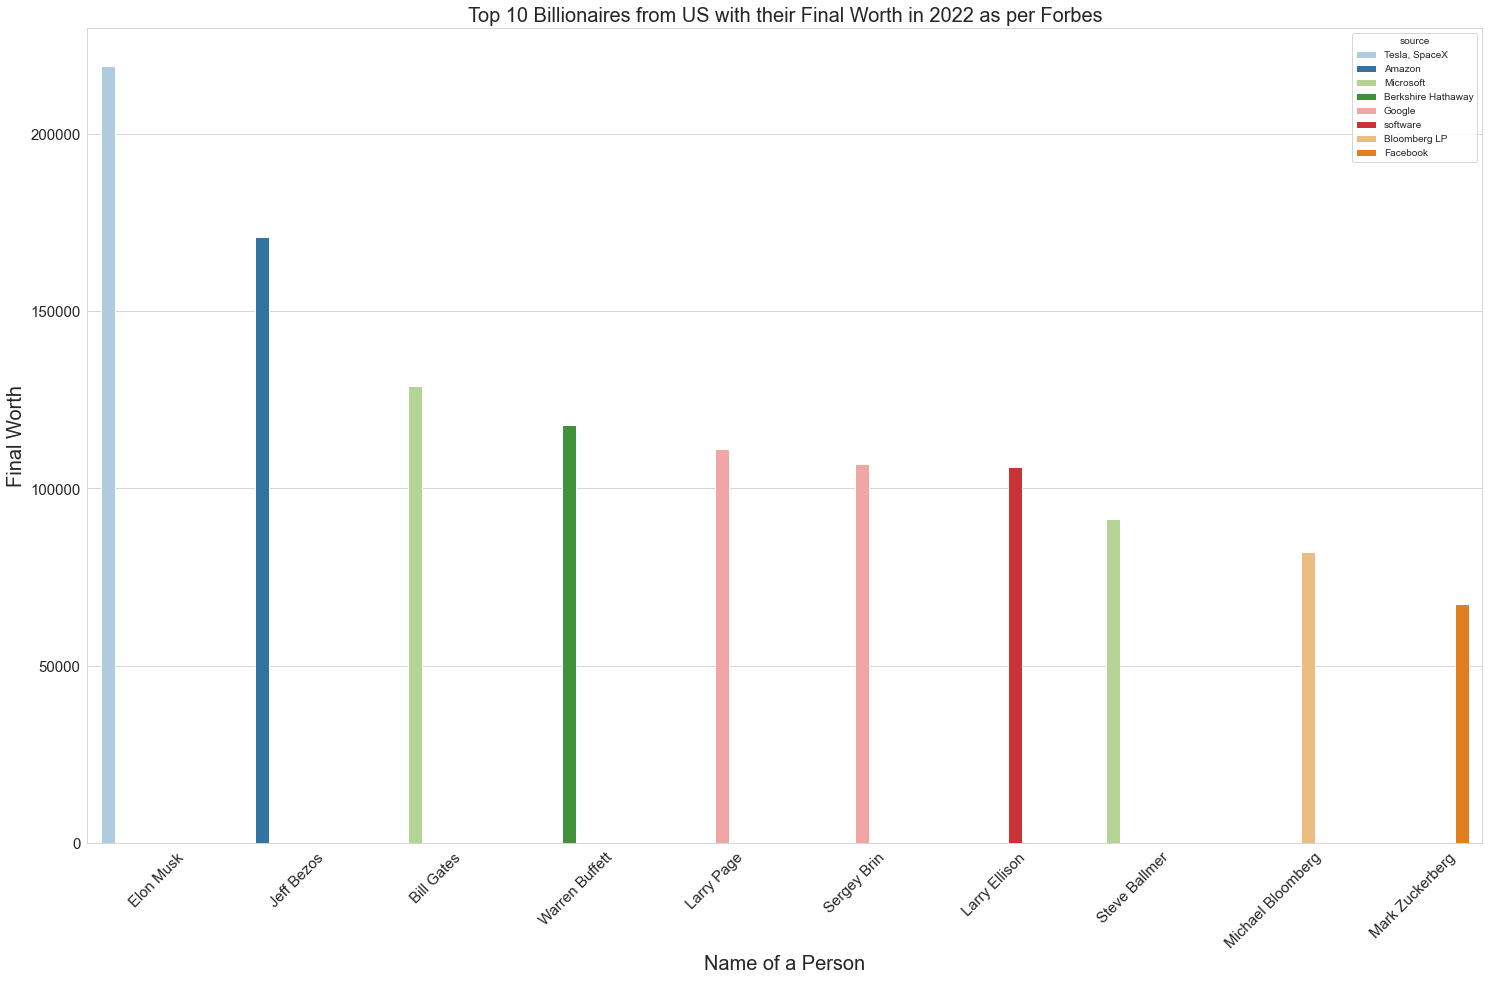

In [91]:
plt.figure(figsize = (25,15))
sns.set_style = ("whitegrid")
sns.barplot(x="personName",y="finalWorth",hue='source',data=df_cn,palette="Paired")
plt.xticks(rotation = 45 , fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name of a Person",fontsize=20)
plt.ylabel("Final Worth",fontsize=20)
plt.title("Top 10 Billionaires from US with their Final Worth in 2022 as per Forbes",fontsize=20)
plt.show()

## Top 10 Billionaires from India and their Final Worth and Source

In [90]:
df_india = data[(data['country'] == 'India')][0:10]
df_india

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,group
9,10,Mukesh Ambani,64.0,90700,Diversified,diversified,India,Mumbai,India,False,M,1957-04-19,50+
10,11,Gautam Adani & family,59.0,90000,Diversified,"infrastructure, commodities",India,Ahmedabad,India,True,M,1962-06-24,50+
46,47,Shiv Nadar,76.0,28700,Technology,software services,India,Delhi,India,True,M,1945-07-18,50+
56,56,Cyrus Poonawalla,80.0,24300,Healthcare,vaccines,India,Pune,India,False,M,1941-05-11,50+
80,81,Radhakishan Damani,67.0,20000,Fashion & Retail,"retail, investments",India,Mumbai,India,True,M,1955-01-01,50+
91,91,Savitri Jindal & family,72.0,17700,Metals & Mining,steel,India,Hisar,India,False,F,1950-03-20,50+
105,106,Kumar Birla,54.0,16500,Diversified,commodities,India,Mumbai,India,False,M,1967-06-14,50+
114,115,Dilip Shanghvi,66.0,15600,Healthcare,pharmaceuticals,India,Mumbai,India,True,M,1955-10-01,50+
124,125,Pallonji Mistry,92.0,15000,Construction & Engineering,construction,India,Mumbai,Ireland,False,M,1929-06-01,50+
128,129,Uday Kotak,63.0,14300,Finance & Investments,banking,India,Mumbai,India,True,M,1959-03-15,50+


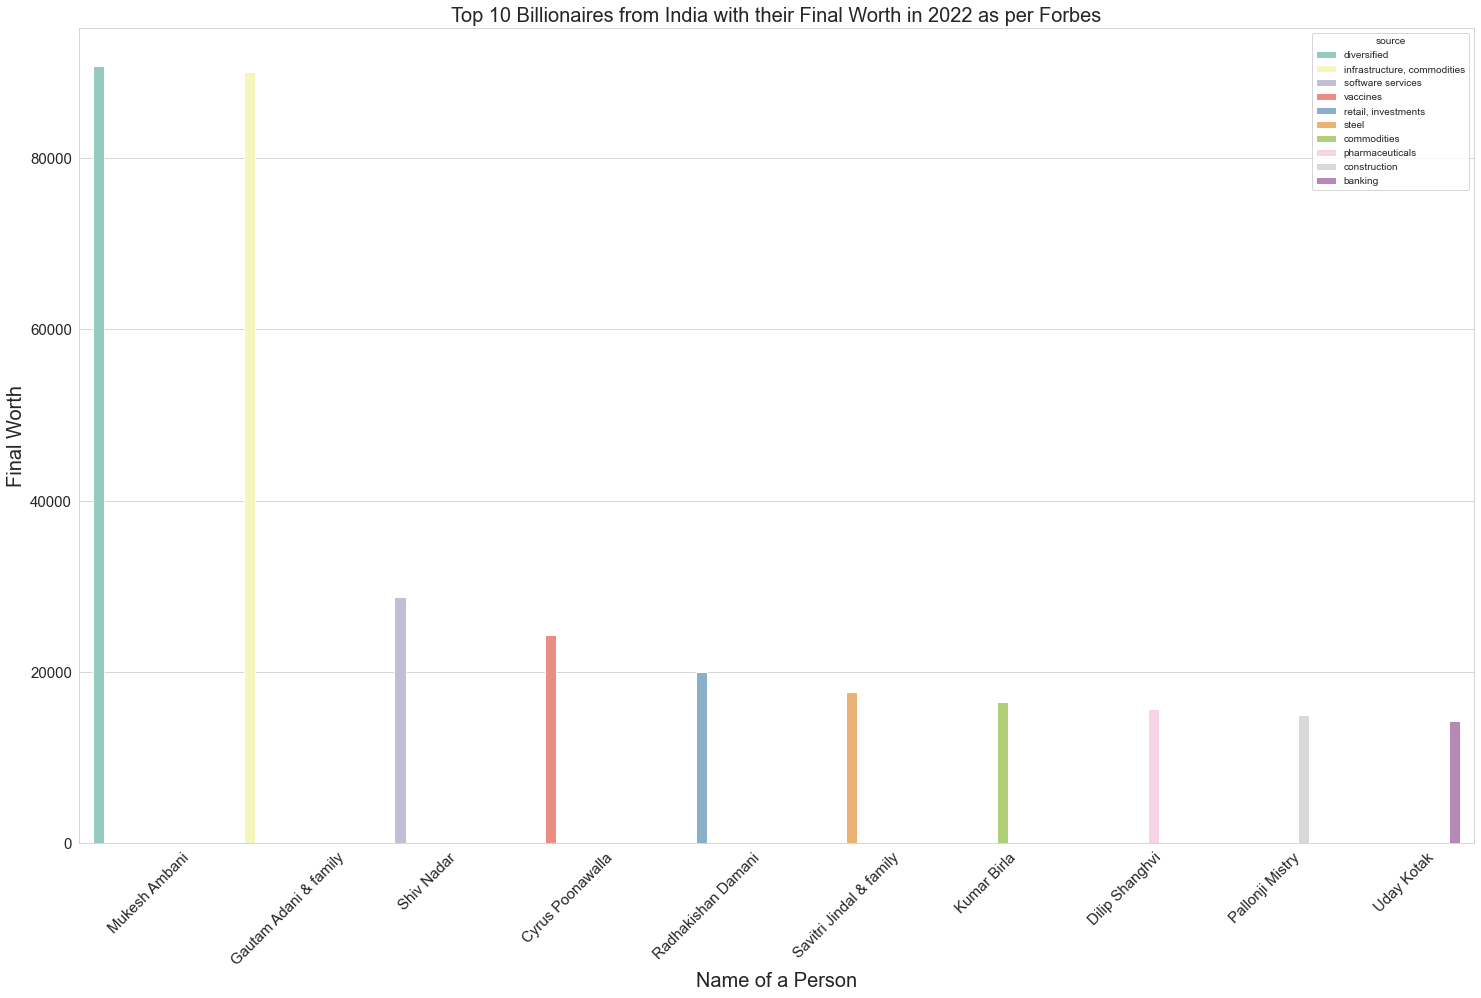

In [94]:
plt.figure(figsize = (25,15))
sns.set_style = ("bright")
sns.barplot(x="personName",y="finalWorth",hue='source',data=df_india,palette="Set3")
plt.xticks(rotation = 45 , fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name of a Person",fontsize=20)
plt.ylabel("Final Worth",fontsize=20)
plt.title("Top 10 Billionaires from India with their Final Worth in 2022 as per Forbes",fontsize=20)
plt.show()

## Top 10 Self Made Billionaires from India and their Final Worth and Source

In [105]:
df_india_self = data[(data['country'] == 'India') & (data['selfMade'] == 'True')][0:10]
df_india_self

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,group
10,11,Gautam Adani & family,59.0,90000,Diversified,"infrastructure, commodities",India,Ahmedabad,India,True,M,1962-06-24,50+
46,47,Shiv Nadar,76.0,28700,Technology,software services,India,Delhi,India,True,M,1945-07-18,50+
80,81,Radhakishan Damani,67.0,20000,Fashion & Retail,"retail, investments",India,Mumbai,India,True,M,1955-01-01,50+
114,115,Dilip Shanghvi,66.0,15600,Healthcare,pharmaceuticals,India,Mumbai,India,True,M,1955-10-01,50+
128,129,Uday Kotak,63.0,14300,Finance & Investments,banking,India,Mumbai,India,True,M,1959-03-15,50+
131,132,Sunil Mittal & family,64.0,13900,Telecom,telecom,India,Delhi,India,True,M,1957-10-23,50+
278,275,Murali Divi & family,71.0,8100,Healthcare,pharmaceuticals,India,Hyderabad,India,True,M,1951-03-17,50+
296,296,Gopikishan Damani,64.0,7800,Fashion & Retail,"retail, investments",India,Mumbai,India,True,M,1958-01-01,50+
362,363,Hasmukh Chudgar & family,88.0,6800,Healthcare,pharmaceuticals,India,Ahmedabad,India,True,M,1933-09-19,50+
439,438,Rakesh Jhunjhunwala,61.0,5800,Finance & Investments,investments,India,Mumbai,India,True,M,1960-07-05,50+


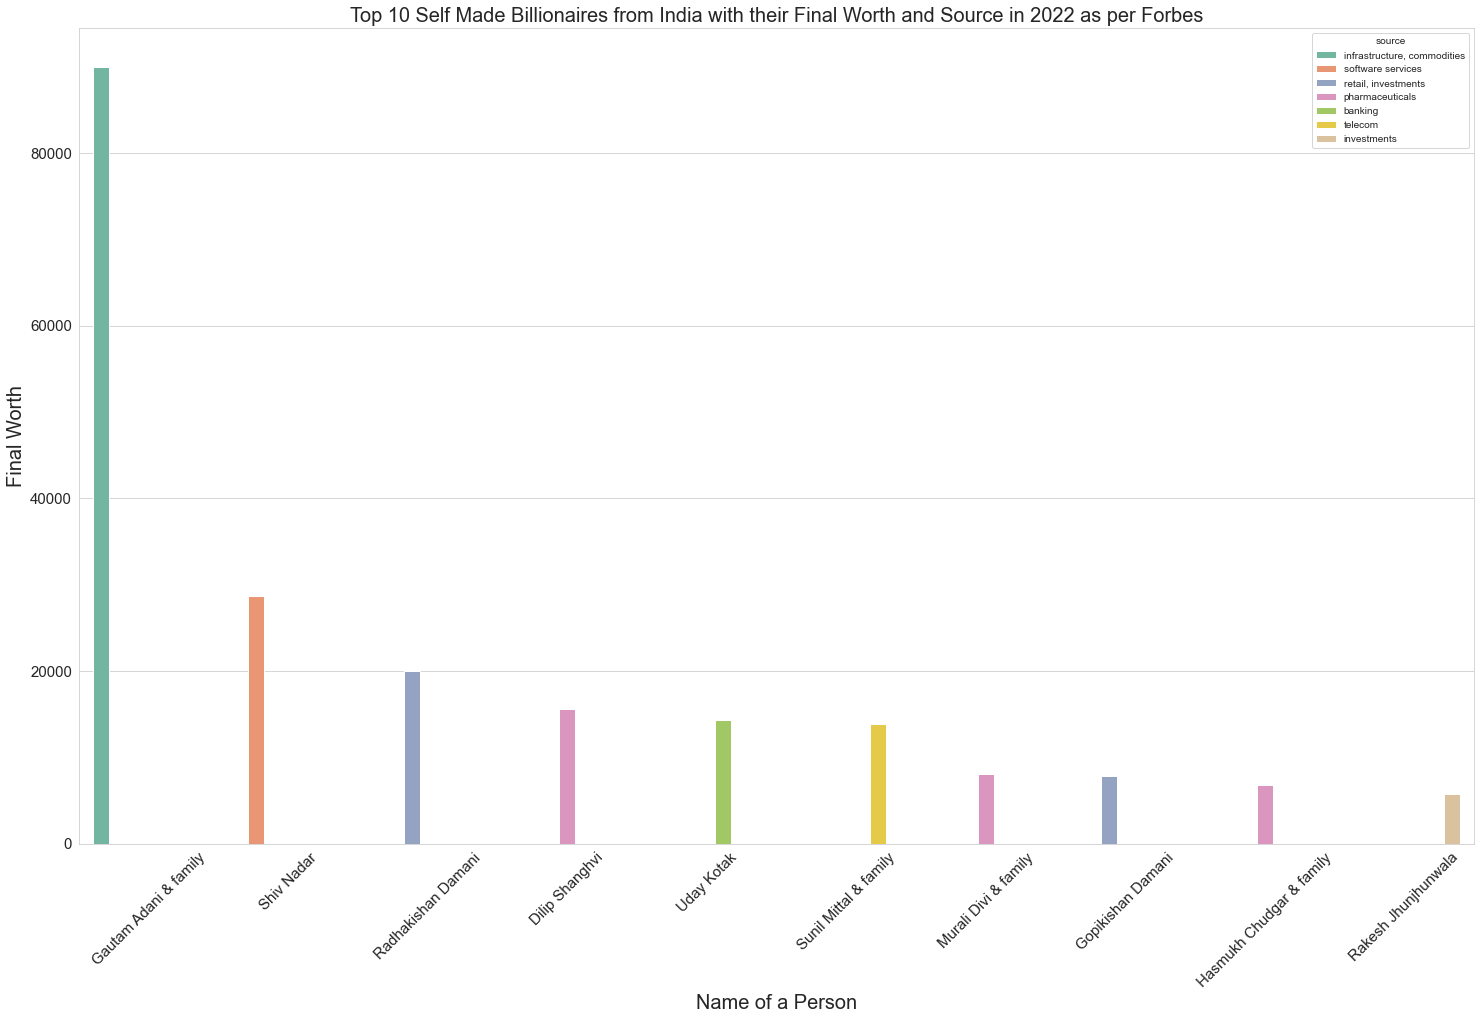

In [107]:
plt.figure(figsize = (25,15))
sns.set_style = ("poster")
sns.barplot(x="personName",y="finalWorth",hue='source',data=df_india_self,palette="Set2")
plt.xticks(rotation = 45 , fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name of a Person",fontsize=20)
plt.ylabel("Final Worth",fontsize=20)
plt.title("Top 10 Self Made Billionaires from India with their Final Worth and Source in 2022 as per Forbes",fontsize=20)
plt.show()

## Women Billionaires from India and their Final Worth and Source 

In [109]:
df_india_female = data[(data['country'] == 'India') & (data['gender'] == 'F')]
df_india_female

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,group
91,91,Savitri Jindal & family,72.0,17700,Metals & Mining,steel,India,Hisar,India,False,F,1950-03-20,50+
644,637,Falguni Nayar,59.0,4500,Fashion & Retail,retailing,India,Mumbai,India,True,F,1963-02-19,50+
795,778,Leena Tewari,64.0,3800,Healthcare,pharmaceuticals,India,Mumbai,India,False,F,1957-09-03,50+
933,913,Kiran Mazumdar-Shaw,69.0,3300,Healthcare,biopharmaceuticals,India,Bangalore,India,True,F,1953-03-23,50+
1247,1238,Smita Crishna-Godrej,71.0,2500,Diversified,consumer goods,India,Mumbai,India,False,F,1950-12-30,50+
1578,1579,Anu Aga,79.0,1900,Construction & Engineering,engineering,India,Pune,India,False,F,1942-08-01,50+
1703,1645,Mrudula Parekh,74.0,1800,Manufacturing,adhesives,India,Mumbai,India,False,F,1948-01-01,50+
1794,1729,Radha Vembu,49.0,1700,Technology,business software,India,Chennai,India,False,F,1972-12-24,30-50
2145,2076,Sara George Muthoot,61.0,1400,Finance & Investments,financial services,India,Delhi,India,False,F,1960-04-22,50+
2539,2448,Kavita Singhania,60.0,1100,Manufacturing,cement,India,Chennai,India,False,F,1962-01-01,50+


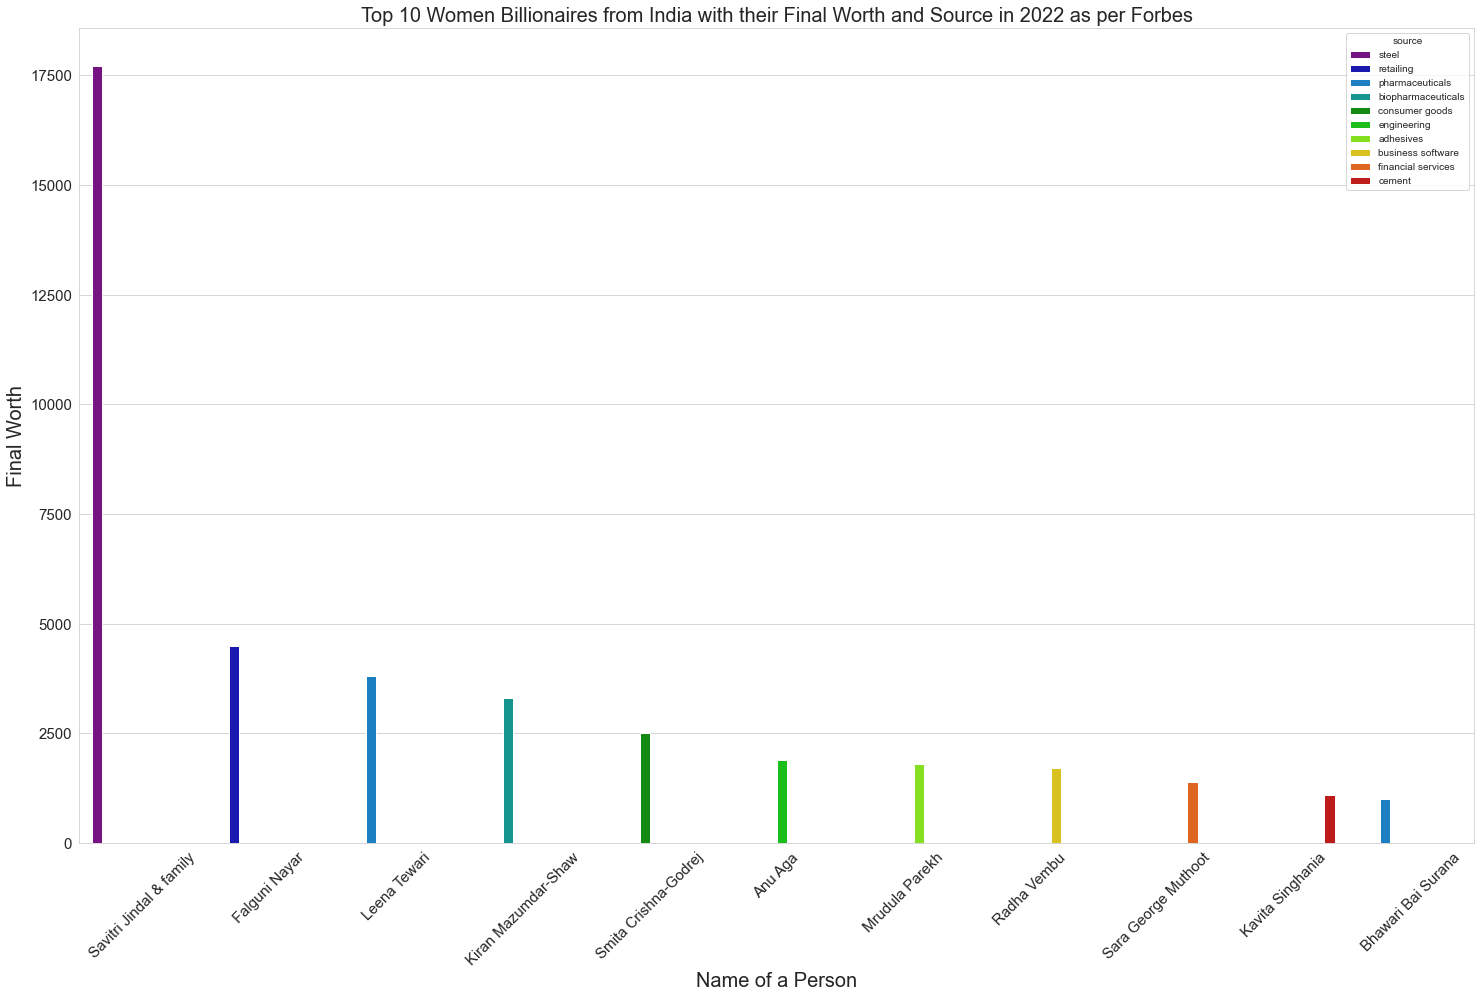

In [111]:
plt.figure(figsize = (25,15))
sns.set_style = ("seaborn-pastel")
sns.barplot(x="personName",y="finalWorth",hue='source',data=df_india_female,palette="nipy_spectral")
plt.xticks(rotation = 45 , fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name of a Person",fontsize=20)
plt.ylabel("Final Worth",fontsize=20)
plt.title("Top 10 Women Billionaires from India with their Final Worth and Source in 2022 as per Forbes",fontsize=20)
plt.show()

In [29]:
import bar_chart_race as bcr

In [30]:
data.head()

,rank,personName,age,finalWorth,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,Paris,France,False,M,1949-03-05
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Medina,United States,True,M,1955-10-28
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M,1930-08-30


In [81]:
df = data.pivot_table(values = 'finalWorth',index = ['personName'],columns = 'country')[:20]

In [82]:
df

country,Algeria,Andorra,Argentina,Australia,Austria,Bahamas,Bahrain,Belgium,Bermuda,Brazil,...,Tanzania,Thailand,Turkey,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam
personName,,,,,,,,,,,,,,,,,,,,,
A. Jayson Adair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,NaN,NaN
Abdulla Al Futtaim & family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,NaN
Abdulla bin Ahmad Al Ghurair & family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2600.0,NaN,NaN,NaN,NaN
Abdulsamad Rabiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abhay Firodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abigail Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21200.0,NaN,NaN
Abilio dos Santos Diniz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acharya Balkrishna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Foroughi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,NaN,NaN


In [75]:
df.fillna(0, inplace=True)
df.sort_values(list(df.columns),inplace=True)
df = df.sort_index()

In [76]:
df

country,Algeria,Andorra,Argentina,Australia,Austria,Bahamas,Bahrain,Belgium,Bermuda,Brazil,...,Tanzania,Thailand,Turkey,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam
personName,,,,,,,,,,,,,,,,,,,,,
A. Jayson Adair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,0.0,0.0
Abdulla Al Futtaim & family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,0.0
Abdulla bin Ahmad Al Ghurair & family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2600.0,0.0,0.0,0.0,0.0
Abdulsamad Rabiu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abhay Firodia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abigail Johnson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21200.0,0.0,0.0
Abilio dos Santos Diniz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acharya Balkrishna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Foroughi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,0.0,0.0


In [78]:
bcr.bar_chart_race(df=df, title='Billionaire Net Worth', orientation='h',filter_column_colors=True, sort='desc', n_bars=20, steps_per_period=40, period_length=2000)

F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
F:\softwares\Python IDE\Anaconda IDE\lib\site-packages\bar_chart_rac